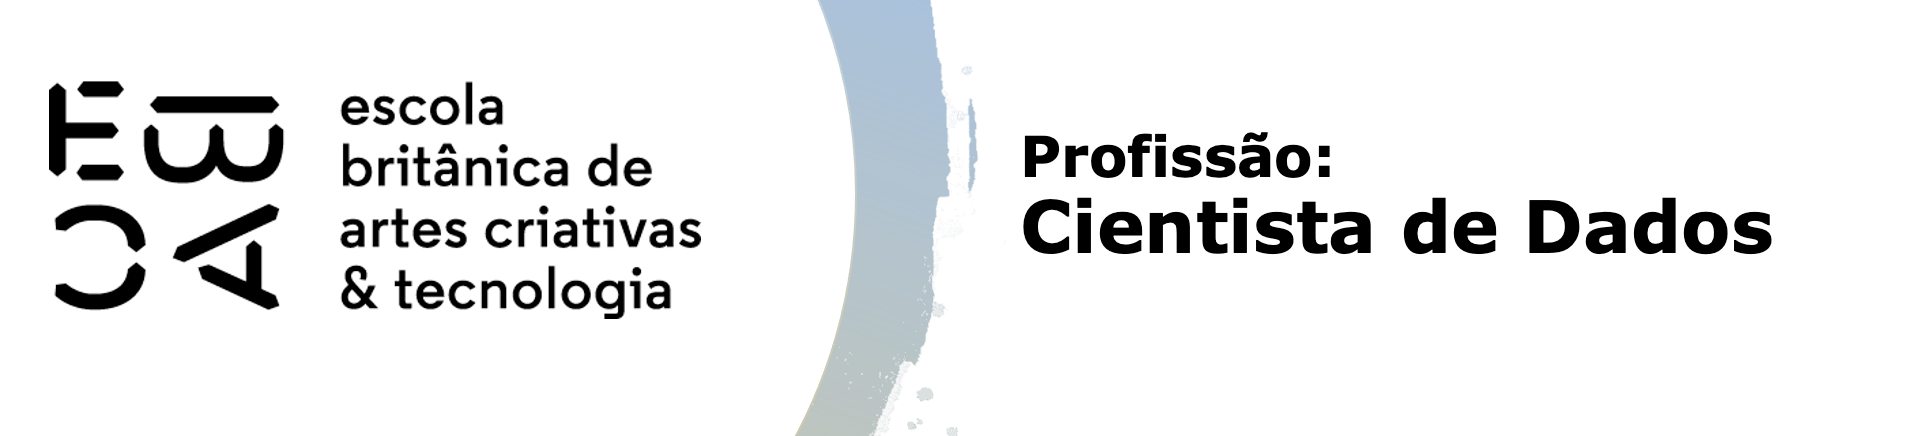

# Tarefa

In [34]:
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind, shapiro, levene, t
import numpy as np
import matplotlib.pyplot as plt

In [17]:
pg = sns.load_dataset('penguins')

In [19]:
pg.groupby('sex')['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,165.0,3862.272727,666.172050,2700.0,3350.0,3650.0,4550.0,5200.0
Male,168.0,4545.684524,787.628884,3250.0,3900.0,4300.0,5312.5,6300.0


<Axes: xlabel='sex', ylabel='body_mass_g'>

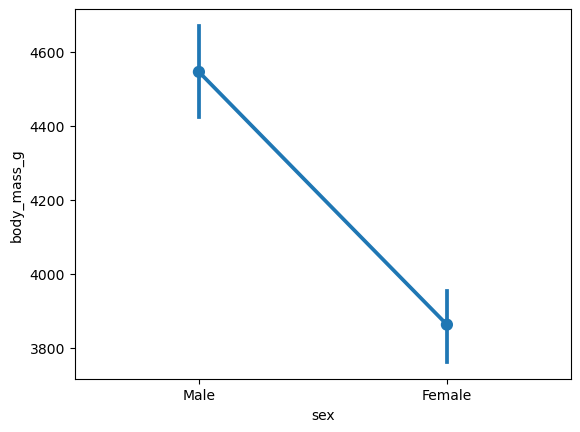

In [21]:
sns.pointplot(data=pg, x='sex', y = 'body_mass_g')

## 1) Diferença de peso entre machos e fêmeas

Na base de pinguins, podemos ver que há diferença de peso entre machos e fêmeas. Mas será que é uma conclusão extrapolável a toda a população de pinguins? Assumindo que essa amostra é aleatória e representativa da população de pinguins, realize um teste T com 5% de significância para verificar se podemos induzir esta conclusão para a população toda.

In [24]:
# Remover valores ausentes
pg_clean = pg.dropna(subset=['sex', 'body_mass_g'])

# Separar os pesos por sexo
male_weights = pg_clean[pg_clean['sex'] == 'Male']['body_mass_g']
female_weights = pg_clean[pg_clean['sex'] == 'Female']['body_mass_g']

# Teste de normalidade (Shapiro-Wilk)
shapiro_male = shapiro(male_weights)
shapiro_female = shapiro(female_weights)

# Teste de homogeneidade de variância (Levene)
levene_test = levene(male_weights, female_weights)

# Teste T para amostras independentes
t_stat, p_value = ttest_ind(male_weights, female_weights, equal_var=True)

# Resultados
print("Teste de Normalidade (Shapiro-Wilk):")
print(f"Machos: W = {shapiro_male.statistic:.3f}, p = {shapiro_male.pvalue:.3f}")
print(f"Fêmeas: W = {shapiro_female.statistic:.3f}, p = {shapiro_female.pvalue:.3f}")

print("\nTeste de Homogeneidade de Variância (Levene):")
print(f"Statistic = {levene_test.statistic:.3f}, p = {levene_test.pvalue:.3f}")

print("\nTeste T para Amostras Independentes:")
print(f"t-stat = {t_stat:.3f}, p = {p_value:.3f}")

Teste de Normalidade (Shapiro-Wilk):
Machos: W = 0.925, p = 0.000
Fêmeas: W = 0.919, p = 0.000

Teste de Homogeneidade de Variância (Levene):
Statistic = 6.059, p = 0.014

Teste T para Amostras Independentes:
t-stat = 8.542, p = 0.000


## 2) (opcional) Representação gráfica do teste

Siga os passos da aula para você poder visualizar a estatística do teste, sua distribuição e a região crítica do teste.

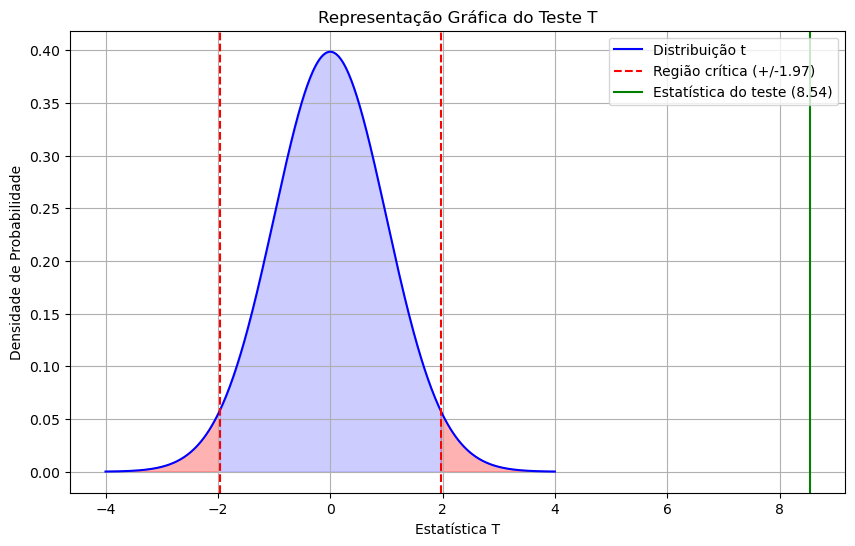

In [36]:
# Parâmetros do teste T
n_male = len(male_weights)
n_female = len(female_weights)
df = n_male + n_female - 2  # Graus de liberdade
alpha = 0.05

# Distribuição T
x = np.linspace(-4, 4, 500)
t_dist = t.pdf(x, df)

# Estatística crítica (valores de corte para a região crítica)
t_crit = t.ppf(1 - alpha / 2, df)  # Bilateral

# Estatística do teste
t_stat, _ = ttest_ind(male_weights, female_weights)

# Gráfico
plt.figure(figsize=(10, 6))
plt.plot(x, t_dist, label='Distribuição t', color='blue')
plt.axvline(t_crit, color='red', linestyle='--', label=f'Região crítica (+/-{t_crit:.2f})')
plt.axvline(-t_crit, color='red', linestyle='--')
plt.axvline(t_stat, color='green', linestyle='-', label=f'Estatística do teste ({t_stat:.2f})')

# Destacando as regiões críticas
plt.fill_between(x, 0, t_dist, where=(x >= t_crit) | (x <= -t_crit), color='red', alpha=0.3)
plt.fill_between(x, 0, t_dist, where=(x < t_crit) & (x > -t_crit), color='blue', alpha=0.2)

# Configurações do gráfico
plt.title('Representação Gráfica do Teste T')
plt.xlabel('Estatística T')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid()
plt.show()

## 3) Considere as espécies

Repita o exercício I, uma vez para cada espécie de pinguim. Qual é o *p-value* associado a cada raça?

In [38]:
# Remover valores ausentes
pg_clean = pg.dropna(subset=['sex', 'body_mass_g', 'species'])

# Lista das espécies
species = pg_clean['species'].unique()

# Dicionário para armazenar os p-values
p_values = {}

# Realizar o teste T para cada espécie
for sp in species:
    # Filtrar os dados por espécie
    species_data = pg_clean[pg_clean['species'] == sp]
    
    # Separar os pesos por sexo
    male_weights = species_data[species_data['sex'] == 'Male']['body_mass_g']
    female_weights = species_data[species_data['sex'] == 'Female']['body_mass_g']
    
    # Realizar o teste T para amostras independentes
    t_stat, p_value = ttest_ind(male_weights, female_weights, equal_var=True)
    
    # Armazenar o p-value
    p_values[sp] = p_value

# Exibir os p-values
for sp, p_val in p_values.items():
    print(f"Espécie: {sp}, p-value: {p_val:.3f}")

Espécie: Adelie, p-value: 0.000
Espécie: Chinstrap, p-value: 0.000
Espécie: Gentoo, p-value: 0.000


Rejeitamos 
𝐻
0 e podemos concluir que há uma diferença significativa no peso entre machos e fêmeas para as espécie.